In [7]:
import keras

In [8]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
numpy.random.seed(7)

In [9]:
import pandas
dataset = pandas.read_csv("diabetes.csv")



In [10]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
dataset.shape()

TypeError: 'tuple' object is not callable

In [13]:
fields=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
def check_zero(data,fields):
    for field in fields:
        print('field %s: num 0-entries: %d' % (field, len(data.loc[ data[field] == 0, field ])))
        
check_zero(dataset,fields)
        


field Glucose: num 0-entries: 5
field BloodPressure: num 0-entries: 35
field SkinThickness: num 0-entries: 227
field Insulin: num 0-entries: 374
field BMI: num 0-entries: 11


In [14]:
from sklearn.model_selection import train_test_split

features=list(dataset.columns.values)
features.remove('Outcome')
print(features)
X=dataset[features]
Y=dataset['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
(576, 8)
(192, 8)


In [17]:
import numpy as np
def input_zero_field(data,field):
    nonval=data.loc[data[field]!=0,field]
    avg=np.sum(nonval)/len(nonval)
    k=len(data.loc[data[field]==0,field])
    data.loc[data[field]==0,field]=avg
    print('Field: %s; fixed %d entries with value: %.3f' % (field, k, avg))

In [18]:
for field in fields:
    input_zero_field(X_train,field)

C:\Users\Dibs Gautam\Anaconda3\envs\tensoflow-sessions\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Field: Glucose; fixed 4 entries with value: 122.003
Field: BloodPressure; fixed 25 entries with value: 72.846
Field: SkinThickness; fixed 163 entries with value: 29.465
Field: Insulin; fixed 270 entries with value: 158.464
Field: BMI; fixed 8 entries with value: 32.663


In [19]:
check_zero(X_train,fields)

field Glucose: num 0-entries: 0
field BloodPressure: num 0-entries: 0
field SkinThickness: num 0-entries: 0
field Insulin: num 0-entries: 0
field BMI: num 0-entries: 0


In [20]:
for field in fields:
    input_zero_field(X_test,field)

Field: Glucose; fixed 1 entries with value: 120.738
Field: BloodPressure; fixed 10 entries with value: 71.071
Field: SkinThickness; fixed 64 entries with value: 28.148
Field: Insulin; fixed 104 entries with value: 145.409
Field: BMI; fixed 3 entries with value: 31.841


In [21]:
check_zero(X_test,fields)

field Glucose: num 0-entries: 0
field BloodPressure: num 0-entries: 0
field SkinThickness: num 0-entries: 0
field Insulin: num 0-entries: 0
field BMI: num 0-entries: 0


## Neural Design

We define a 3-layer NN model in Keras

    First layer: 12 nodes, with RELU activation
    2nd layer: 8 nodes, with RELU activation
    3rd layer: output, with sigmoid activation


In [22]:
N_EPOCHS=100
BATCH_SIZE=16

model=Sequential()

model.add(Dense(12,input_dim=8,init='uniform',activation='relu'))
model.add(Dense(8,init='uniform',activation='relu'))
model.add(Dense(1,init='uniform',activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\Dibs Gautam\Anaconda3\envs\tensoflow-sessions\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Dibs Gautam\Anaconda3\envs\tensoflow-sessions\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Dibs Gautam\Anaconda3\envs\tensoflow-sessions\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [24]:


history=model.fit(X_train,y_train,validation_data=(X_test,y_test),nb_epoch=N_EPOCHS,batch_size=BATCH_SIZE,
                    verbose=0)

C:\Users\Dibs Gautam\Anaconda3\envs\tensoflow-sessions\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.cast instead.


In [25]:


# print final accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



acc: 73.44%


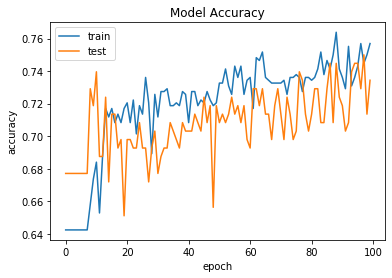

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()



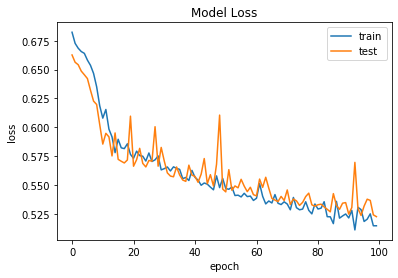

In [28]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()